In [2]:
from numpy import *
from matplotlib.pyplot import *
from numpy.linalg import inv

In [3]:
N = 5
x = linspace(-1,1,N+1)
f = exp(sin(pi*x)) 
M = 1000
xx = linspace(-1,1,M)
l = ones((N+1,M))


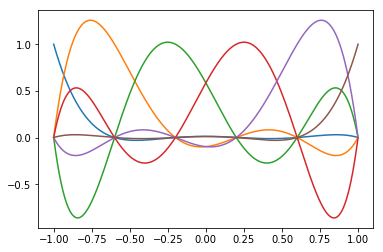

In [4]:
for i in range(N+1):
    for j in range(N+1):
        if i!=j :
            l[i,:] = l[i,:]*(xx-x[j])/(x[i]-x[j])

for i in range(N+1):
    plot(xx,l[i,:],'-')


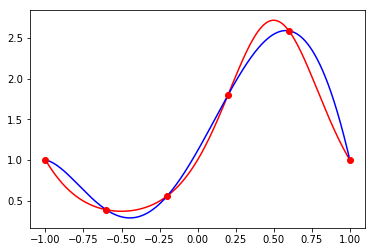

In [5]:
#예측된 선과의 얼마나 정확한지 결과. 
#N이 커질 수록 겹치는 점이 많아진다.즉, N이 커질수록 예측한 함수와 일치해진다. 
f_e = exp(sin(pi*xx))
fN = 0*xx
for i in range(N+1):
    fN=fN+f[i]*l[i,:]
plot(xx,f_e,'-r',xx,fN,'-b')
plot(x,f,'ro')
show()

In [6]:
Error = max(abs(f_e-fN))
print(Error)

0.39881448011106535


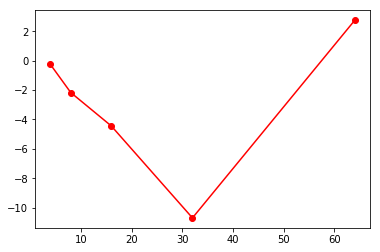

In [7]:
E = [] ; NN = []
N = 2
for i in range(5):
    N=2*N
    x = linspace(-1,1,N+1)
    f = exp(sin(pi*x)) 
    M = 1000
    xx = linspace(-1,1,M)
    l = ones((N+1,M)) 
    for i in range(N+1):
        for j in range(N+1):
            if i!=j :
                l[i,:] = l[i,:]*(xx-x[j])/(x[i]-x[j])
                f_e = exp(sin(pi*xx))
                fN = 0*xx
    for i in range(N+1):
        fN=fN+f[i]*l[i,:]
    Error = max(abs(f_e-fN))
    E.append(Error)
    NN.append(N)
plot(NN,log(E),'-or')  
#데이터가 작아질수록 Error가 작아지는 것은 맞으나,
#N이 약 32정도보다 커지면 overfitting이 되면서 신뢰가 떨어지는 결과값이 나온다

In [14]:
'''
error = 10^(an+b)
-> 10^an*b
E = P^n*A
데이터가 많아질수록 지수함수적으로 Error 가 감소한다
overfitting 10^-16 machine zero 컴퓨터가 읽을 수 있는 최대한의 소수점
점점 한계수용치를 넘어가면 지수함수적으로 에러가 늘어난다
'''


'\nerror = 10^(an+b)\n-> 10^an*b\nE = P^n*A\n데이터가 많아질수록 지수함수적으로 Error 가 감소한다\noverfitting 10^-16 machine zero 컴퓨터가 읽을 수 있는 최대한의 소수점\n점점 한계수용치를 넘어가면 지수함수적으로 에러가 늘어난다\n따라서 f(x) = 1/1+25*x^2\n'

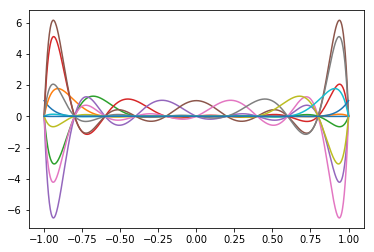

In [14]:
N = 10
x = linspace(-1,1,N+1)
f = 1/(1+25*x**2)
#위에 x와 차별화를 줄려고 , row vector들의 값
M = 1000
xx = linspace(-1,1,M)
l = ones((N+1,M))
for i in range(N+1):
    for j in range(N+1):
        if i!=j :
            l[i,:] = l[i,:]*(xx-x[j])/(x[i]-x[j])
for i in range(N+1):
    plot(xx,l[i,:],'-')


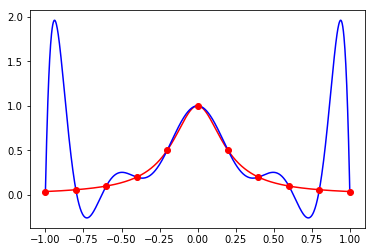

In [15]:
f_e = 1/(1+25*xx**2)
fN = 0*xx
for i in range(N+1):
    fN=fN+f[i]*l[i,:]
plot(xx,f_e,'-r',xx,fN,'-b')
plot(x,f,'ro')
show()

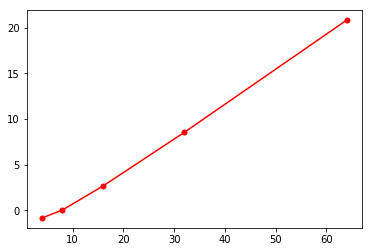

In [16]:
E = [] ; NN = []
N = 2
for i in range(5):
    N=2*N
    x = linspace(-1,1,N+1)
    f = 1/(1+25*x**2)
    M = 1000
    xx = linspace(-1,1,M)
    l = ones((N+1,M)) 
    for i in range(N+1):
        for j in range(N+1):
            if i!=j :
                l[i,:] = l[i,:]*(xx-x[j])/(x[i]-x[j])
                f_e = 1/(1+25*xx**2)
                fN = 0*xx
    for i in range(N+1):
        fN=fN+f[i]*l[i,:]
    Error = max(abs(f_e-fN))
    E.append(Error)
    NN.append(N)
plot(NN,log(E),'-or',markersize = 5)        
#위와 결과와는 다른 상태의 N이 커질수록 overfitting 이된다

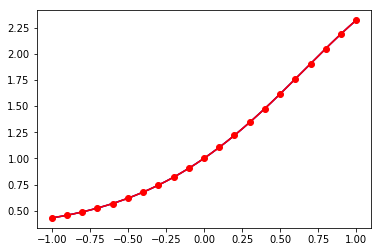

In [17]:
N = 20; m =10
x=linspace(-1,1,N+1)
f=exp(sin(x))
X1 = zeros((N+1,m+1))
for i in range(m+1):
    X1[:,i]=x**i
xt=transpose(X1)

M = matmul(xt,X1)
RHS = matmul(xt,f)
a = matmul(inv(M),RHS)

#model continuous ft
xi = linspace(-1,1,1000)
ft = exp(sin(xi))
fN = 0*xi
for i in range(m+1):
    fN=fN+(a[i]*xi**i)
plot(xi,ft,'-r',xi,ft,'-b')
plot(xi,fN,'-r')
plot(x,f,'or')
show()

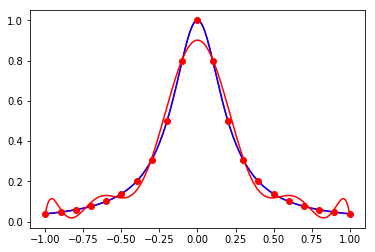

In [22]:
N = 20; m = 10
x=linspace(-1,1,N+1)
f=1/(1+25*x**2)
X1 = zeros((N+1,m+1))
for i in range(m+1):
    X1[:,i]=x**i
xt=transpose(X1)

M = matmul(xt,X1)
RHS = matmul(xt,f)
a = matmul(inv(M),RHS)

#model continuous ft
xi = linspace(-1,1,1000)
ft = 1/(1+25*xi**2)
fN = 0*xi
for i in range(m+1):
    fN=fN+(a[i]*xi**i)
plot(xi,ft,'-r',xi,ft,'-b')
plot(xi,fN,'-r')
plot(x,f,'or')
show()

```
통계청에서 가져온 데이터를 사용하여 인구상승률을 예측한다.
```

(1960, 2064, 25012374.0, 77169301.5)

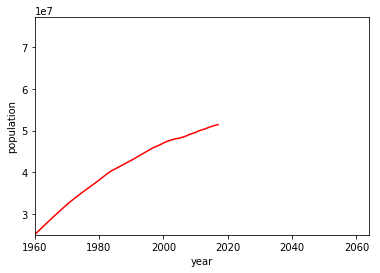

In [23]:
#데이터의 기본형태
pop = loadtxt("kor.txt")
y = pop[:,0]
p = pop[:,1]
#plot 그리기
plot(y,p,'r-')
xlabel('year')
ylabel('population')
axis((1960,2064,min(p),1.5*max(p)))

In [35]:
N = 57; m = 2
pop = loadtxt("kor.txt")
y = pop[:,0]
p = pop[:,1]
#plot 그리기

X1 = zeros((N+1,m+1))
y = (1/(2017-1960))*(y-1960)
x = y
f = p
for i in range(m+1):
    X1[:,i]=x**i
xt = transpose(X1)

M = matmul(xt,X1)
RHS = matmul(xt,f)
a = matmul(inv(M),RHS)

#model continuous ft
yp = (1/(2017-1960))*(2064-1960) 
xi = linspace(0,yp,1000)

fN = 0*xi
for i in range(m+1):
    fN = fN+(a[i]*xi**i)

47242507.49023073


(0, 1.8245614035087718, 25012374.0, 77169301.5)

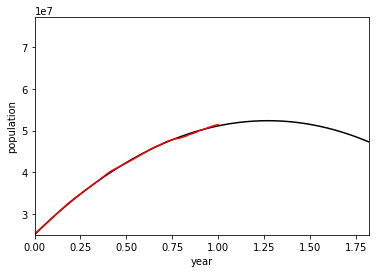

In [37]:
#2064년에는 약 4.7천만명의 결과값이 나온다.
plot(xi,fN,'-k')
plot(x,f,'-r')
print(fN[-1])

xlabel('year')
ylabel('population')
axis((0,yp,min(p),1.5*max(p)))

In [33]:
N = 57; m = 2
pop = loadtxt("kor.txt")
y = pop[:,0]
p = pop[:,1]
#plot 그리기

X1 = zeros((N+1,m+1))
y = (1/(2017-1960))*(y-1960)
x = y
f = p
for i in range(m+1):
    X1[:,i]=x**i
xt = transpose(X1)

e=zeros((m+1,m+1))
M = matmul(xt,X1)+e
RHS = matmul(xt,f)
a = matmul(inv(M),RHS)

#model continuous ft
yp = (1/(2017-1960))*(2064-1960) 
xi = linspace(0,yp,1000)

47242507.49023073


(0, 1.8245614035087718, 25012374.0, 77169301.5)

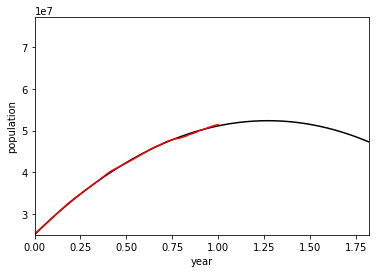

In [34]:
fN = 0*xi
for i in range(m+1):
    fN = fN+(a[i]*xi**i)
plot(xi,fN,'-k')
plot(x,f,'-r')
print(fN[-1])

xlabel('year')
ylabel('population')
axis((0,yp,min(p),1.5*max(p)))

```
새데이터 'scale'을 가지고 scale내에서 과연 얼마나 예측정도를 가지고 있는가 확인한다.
```

[-0.2792 -0.2792  0.2792  0.2792]


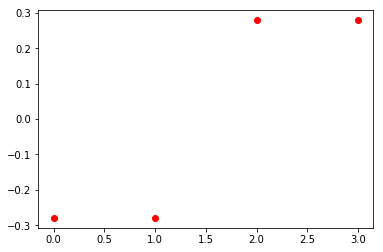

In [39]:
D = loadtxt("scale2.txt")
y  = D[:,0]
s = len(y)
x = zeros((4,s))
for i in range(s):
    x[:,i]=D[i,1:5]
xt = transpose(x)
xy = matmul(x,y)
xxt = matmul(x,xt)
w = matmul(inv(xxt),xy)
print(w)
plot(w,"or")

In [40]:
a = (y-matmul(w,x))
sum(a)/(s+1)*100

1.6458258256424044e-14

In [42]:
A = 0 
for i in range(s):
    #xi = D[s,1:5]
    xw = matmul(x[:,i],w)
    if xw >= 0.1:
        pre=1
    elif xw <= 0.1:
        pre = -1
    else:
        pre = 0
    if pre == y[i]:
        A = A+1
A = A/s*100
print(A)
#약 87%의 정확도를 가지고있다.

87.68
